In [29]:
import datacube
import xarray as xr
import pandas as pd
%matplotlib inline
# % 

In [30]:
from datacube.storage.masking import mask_invalid_data

In [31]:
#app is a note to let GA know what we are doing with it, user-defined
#when loading data, #make sure data is on same coordinate scale or convert 
dc=datacube.Datacube(app='learn-data-access')
dc

Datacube<index=Index<db=PostgresDb<engine=Engine(postgresql://sl1412@130.56.244.105:6432/datacube)>>>

In [32]:
products = dc.list_products()
products.columns.tolist()

['name',
 'description',
 'gqa_ref_source',
 'gqa_stddev_xy',
 'ancillary_quality',
 'format',
 'lon',
 'sat_path',
 'product_type',
 'gqa_mean_xy',
 'gqa_abs_xy',
 'gqa_abs_iterative_mean_xy',
 'gqa_final_gcp_count',
 'sat_row',
 'platform',
 'orbit',
 'gqa_iterative_mean_xy',
 'gqa_cep90',
 'instrument',
 'gsi',
 'gqa_iterative_stddev_xy',
 'lat',
 'time',
 'gqa',
 'gqa_error_message',
 'crs',
 'resolution',
 'tile_size',
 'spatial_dimensions']

In [33]:
display_columns = ['name', 'description', 'platform', 'product_type', 'instrument', 'crs', 'resolution']
display_columns

['name',
 'description',
 'platform',
 'product_type',
 'instrument',
 'crs',
 'resolution']

In [34]:
# #list only nbar products
Rainfall_list = products[products['product_type'] == 'rainfall'][display_columns].dropna()
# productlist = products[display_columns].dropna()
Rainfall_list

,name,description,platform,product_type,instrument,crs,resolution
id,,,,,,,
36,bom_rainfall_grids,Interpolated Rain Gauge Precipitation 1-Day Au...,BoM,rainfall,rain gauge,EPSG:4326,"[-0.05, 0.05]"


In [35]:
measurements = dc.list_measurements()
measurements.columns.tolist()

['aliases',
 'dtype',
 'flags_definition',
 'name',
 'nodata',
 'spectral_definition',
 'units']

In [36]:
display_columns = ['units', 'nodata', 'aliases']
# display meausrements for one product
measurements[display_columns].loc['bom_rainfall_grids']

,units,nodata,aliases
measurement,,,
rainfall,mm,-999,NaN


In [37]:
query = {
    'time': ('2013-01-01', '2014-12-31'),
    'lat': (-31, -35),
    'lon': (149, 150),
}

In [38]:
# attempt BoM rainfall 
#2 stars unpack the limits of our query, we load specific measurements from a product
Rainfall_data = dc.load(product='bom_rainfall_grids', measurements=['rainfall'], **query)

In [42]:
Rainfalldata = mask_invalid_data(Rainfall_data)
Rainfalldata

<xarray.Dataset>
Dimensions:    (latitude: 80, longitude: 20, time: 365)
Coordinates:
  * time       (time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
  * latitude   (latitude) float64 -31.02 -31.07 -31.12 -31.17 -31.22 -31.27 ...
  * longitude  (longitude) float64 149.0 149.1 149.1 149.2 149.2 149.3 149.3 ...
Data variables:
    rainfall   (time, latitude, longitude) float32 0.000262413 0.000480972 ...
Attributes:
    crs:      EPSG:4326

In [44]:
Rainfalldata.time

<xarray.DataArray 'time' (time: 365)>
array(['2013-01-01T00:00:00.000000000', '2013-01-02T00:00:00.000000000',
       '2013-01-03T00:00:00.000000000', ..., '2013-12-29T00:00:00.000000000',
       '2013-12-30T00:00:00.000000000', '2013-12-31T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
Attributes:
    units:    seconds since 1970-01-01 00:00:00

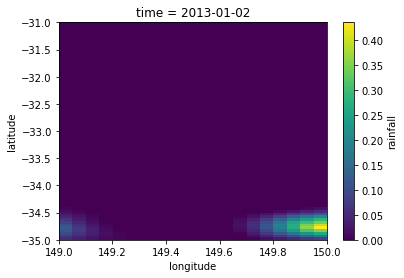

In [45]:
Rainfalldata.rainfall.isel(time=1).plot.imshow() # selection of time = 0 for red variable

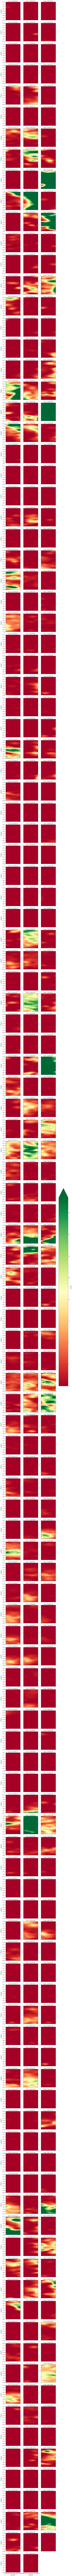

In [49]:
Rainfalldata.rainfall.plot.imshow(col='time', robust = True, col_wrap=3, cmap = 'RdYlGn')

In [55]:
Rainmonth=Rainfalldata.resample(time="1M").sum()

/g/data/v10/public/modules/agdc-py3-env/20171214/envs/agdc/lib/python3.6/site-packages/xarray/core/common.py:594: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  label=label, base=base)


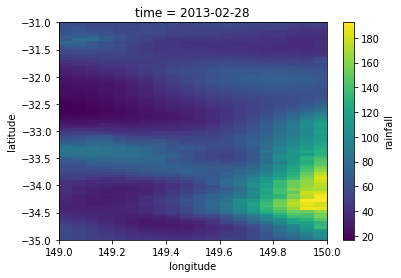

In [56]:
Rainmonth.rainfall.isel(time=1).plot.imshow() # selection of time = 0 for red variable

In [1]:
import standard_precip

ModuleNotFoundError: No module named 'standard_precip'